In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')
import pickle 
import os 
import numpy as np
import cv2 
%matplotlib inline

/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg
/kaggle/input/chest-xray-pneumo

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person483_virus_985.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1574_bacteria_4118.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person264_virus_547.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person872_bacteria_2795.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person415_bacteria_1839.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person701_bacteria_2600.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person62_bacteria_301.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person291_bacteria_1374.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person661_virus_1245.

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0617-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0668-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1423-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0912-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1010-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0563-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0432-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0588-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1345-0001-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/c

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person18_virus_49.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person1641_virus_2840.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person1615_virus_2801.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person85_bacteria_422.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person20_virus_51.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person123_bacteria_587.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person1644_virus_2844.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person1670_virus_2886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person80_bacteria_392.jpeg
/kaggle/input/che

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person957_virus_1629.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1372_bacteria_3498.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1284_bacteria_3247.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person439_virus_891.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person501_bacteria_2113.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1559_bacteria_4067.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1001_bacteria_2932.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person739_virus_1361.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1644_bacteria_4357.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person537_bact

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person295_bacteria_1390.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person543_bacteria_2282.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person817_bacteria_2728.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person423_bacteria_1855.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person257_bacteria_1191.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1542_virus_2683.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person73_bacteria_355.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person52_bacteria_251.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person492_bacteria_2085.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person590_virus

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0242-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1047-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0553-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0578-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0945-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0520-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1291-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0871-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0533-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1142-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0246-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0246-0001-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0086-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/IM-0101-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0348-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0219-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0139-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/IM-0017-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0341-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/IM-0091-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/

/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person957_virus_1629.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1372_bacteria_3498.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1284_bacteria_3247.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person439_virus_891.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person501_bacteria_2113.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1559_bacteria_4067.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1001_bacteria_2932.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person739_virus_1361.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1644_bacteria_4357.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person537_bacteria_2261.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person365_virus_745.jpeg
/kaggle/

/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1314_virus_2269.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1202_bacteria_3153.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person843_virus_1485.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person15_bacteria_52.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person502_bacteria_2117.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1472_bacteria_3834.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person577_bacteria_2378.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1942_bacteria_4865.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person747_virus_1370.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1323_bacteria_3362.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1643_bacteria_4354.jpeg
/kagg

/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0242-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1047-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0553-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0578-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0945-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0520-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1291-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0871-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0533-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1142-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1422-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0588-0001.j

/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0283-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0217-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0327-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0079-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0086-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0079-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0023-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0036-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0033-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0061-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0051-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0287-0001.jpeg
/kaggle/input/chest-xray

**Using Tensorflow and Keras to build the model**

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.models import Model
from keras.applications import InceptionResNetV2
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LambdaCallback
from keras.callbacks import Callback
from keras import metrics
from keras.optimizers import Adam 
from keras import backend as K
import tensorflow as tf
import keras

Using TensorFlow backend.


**Getting Train,Test and Validate data**

In [3]:
labels = ['PNEUMONIA', 'NORMAL']
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr=cv2.resize(img_arr,(200,200))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
train=get_training_data("../input/chest-xray-pneumonia/chest_xray/chest_xray/train")
test=get_training_data("../input/chest-xray-pneumonia/chest_xray/chest_xray/test")
val=get_training_data("../input/chest-xray-pneumonia/chest_xray/chest_xray/val")

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



**MERGING DATA SINCE VALIDATION DATA IS SMALL/LESS****

In [4]:
X = []
y = []

for feature, label in train:
    X.append(feature)
    y.append(label)

for feature, label in test:
    X.append(feature)
    y.append(label)
    
for feature, label in val:
    X.append(feature)
    y.append(label)


# resize data for deep learning 
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=32)

In [5]:
X_train=X_train/255
X_test=X_test/255
X_val=X_val/255

(3747, 200, 200, 3)


APPENDING MORE DATA/GENERATING MORE DATA FOR TRAINING 

In [6]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=90, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True)  

datagen.fit(X_train)


In [8]:
def create_model(input_shape, n_out):
    pretrain_model = InceptionResNetV2(
        include_top=False, 
        weights='imagenet', 
        input_shape=input_shape)
    input_tensor = Input(shape=input_shape)
    bn = BatchNormalization()(input_tensor)
    x = pretrain_model(bn)
    x = Conv2D(128, kernel_size=(1,1), activation='relu')(x)
    x = Conv2D(128,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu')(x)
    x = Flatten()(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(n_out, activation='sigmoid')(x)
    model = Model(input_tensor, output)
    return model
    

In [9]:
model=create_model(input_shape=(200,200,3),n_out=1)

219062272/219055592 [==============================] - 7s 0us/step


In [10]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
batch_normalization_204 (Bat (None, 200, 200, 3)       12        
_________________________________________________________________
inception_resnet_v2 (Model)  (None, 4, 4, 1536)        54336736  
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 4, 4, 128)         196736    
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 2, 2, 128)         147584    
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0   

In [11]:
model.compile(loss='binary_crossentropy', optimizer=Adam(1e-4),metrics=['acc'])
history = model.fit(datagen.flow(X_train, y_train, batch_size=64), validation_data=(X_val, y_val), epochs=15)


Epoch 1/15
59/59 [==============================] - 179s 3s/step - loss: 0.4548 - acc: 0.7635 - val_loss: 1.3972 - val_acc: 0.7524
Epoch 2/15
59/59 [==============================] - 50s 850ms/step - loss: 0.1851 - acc: 0.9301 - val_loss: 0.9654 - val_acc: 0.7962
Epoch 3/15
59/59 [==============================] - 53s 899ms/step - loss: 0.1343 - acc: 0.9544 - val_loss: 0.3905 - val_acc: 0.8975
Epoch 4/15
59/59 [==============================] - 53s 897ms/step - loss: 0.1267 - acc: 0.9544 - val_loss: 0.2141 - val_acc: 0.9349
Epoch 5/15
59/59 [==============================] - 53s 897ms/step - loss: 0.1113 - acc: 0.9597 - val_loss: 0.1161 - val_acc: 0.9562
Epoch 6/15
59/59 [==============================] - 54s 921ms/step - loss: 0.1063 - acc: 0.9618 - val_loss: 0.1495 - val_acc: 0.9445
Epoch 7/15
59/59 [==============================] - 53s 891ms/step - loss: 0.0877 - acc: 0.9688 - val_loss: 0.1143 - val_acc: 0.9520
Epoch 8/15
59/59 [==============================] - 52s 879ms/step - lo

In [12]:
model.evaluate(X_test,y_test)

1172/1172 [==============================] - 6s 5ms/step


[0.059783165506802426, 0.9761092066764832]

[Text(0, 0.5, 'PNEUMONIA'), Text(0, 1.5, 'NORMAL')]

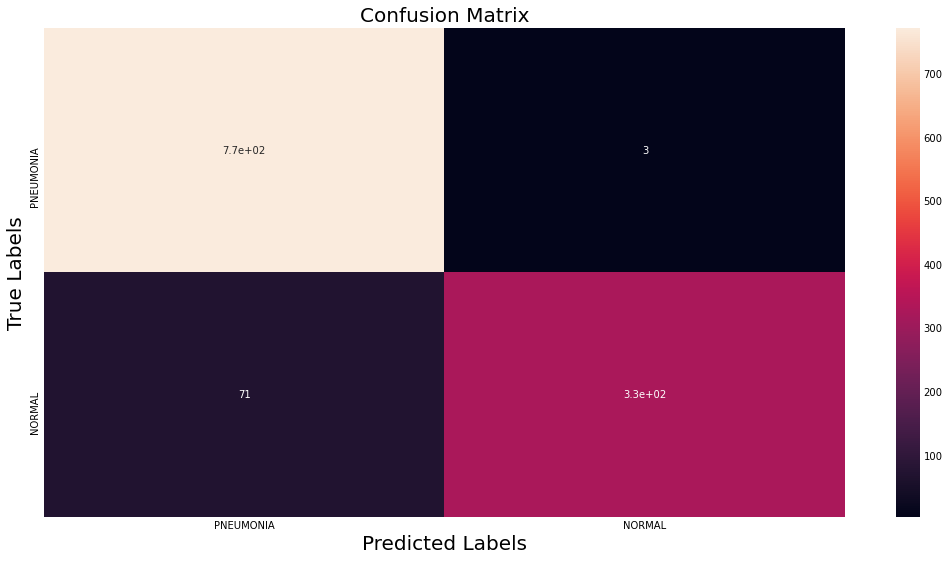

In [15]:
pred = model.predict(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train, pred)
fpr, tpr, thresholds2 = roc_curve(y_train, pred)
predictions = model.predict(X_test)
binary_predictions = []
threshold = thresholds[np.argmax(precisions >= 0.80)]
for i in predictions:
    if i >= threshold:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 
matrix = confusion_matrix(binary_predictions, y_test)
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

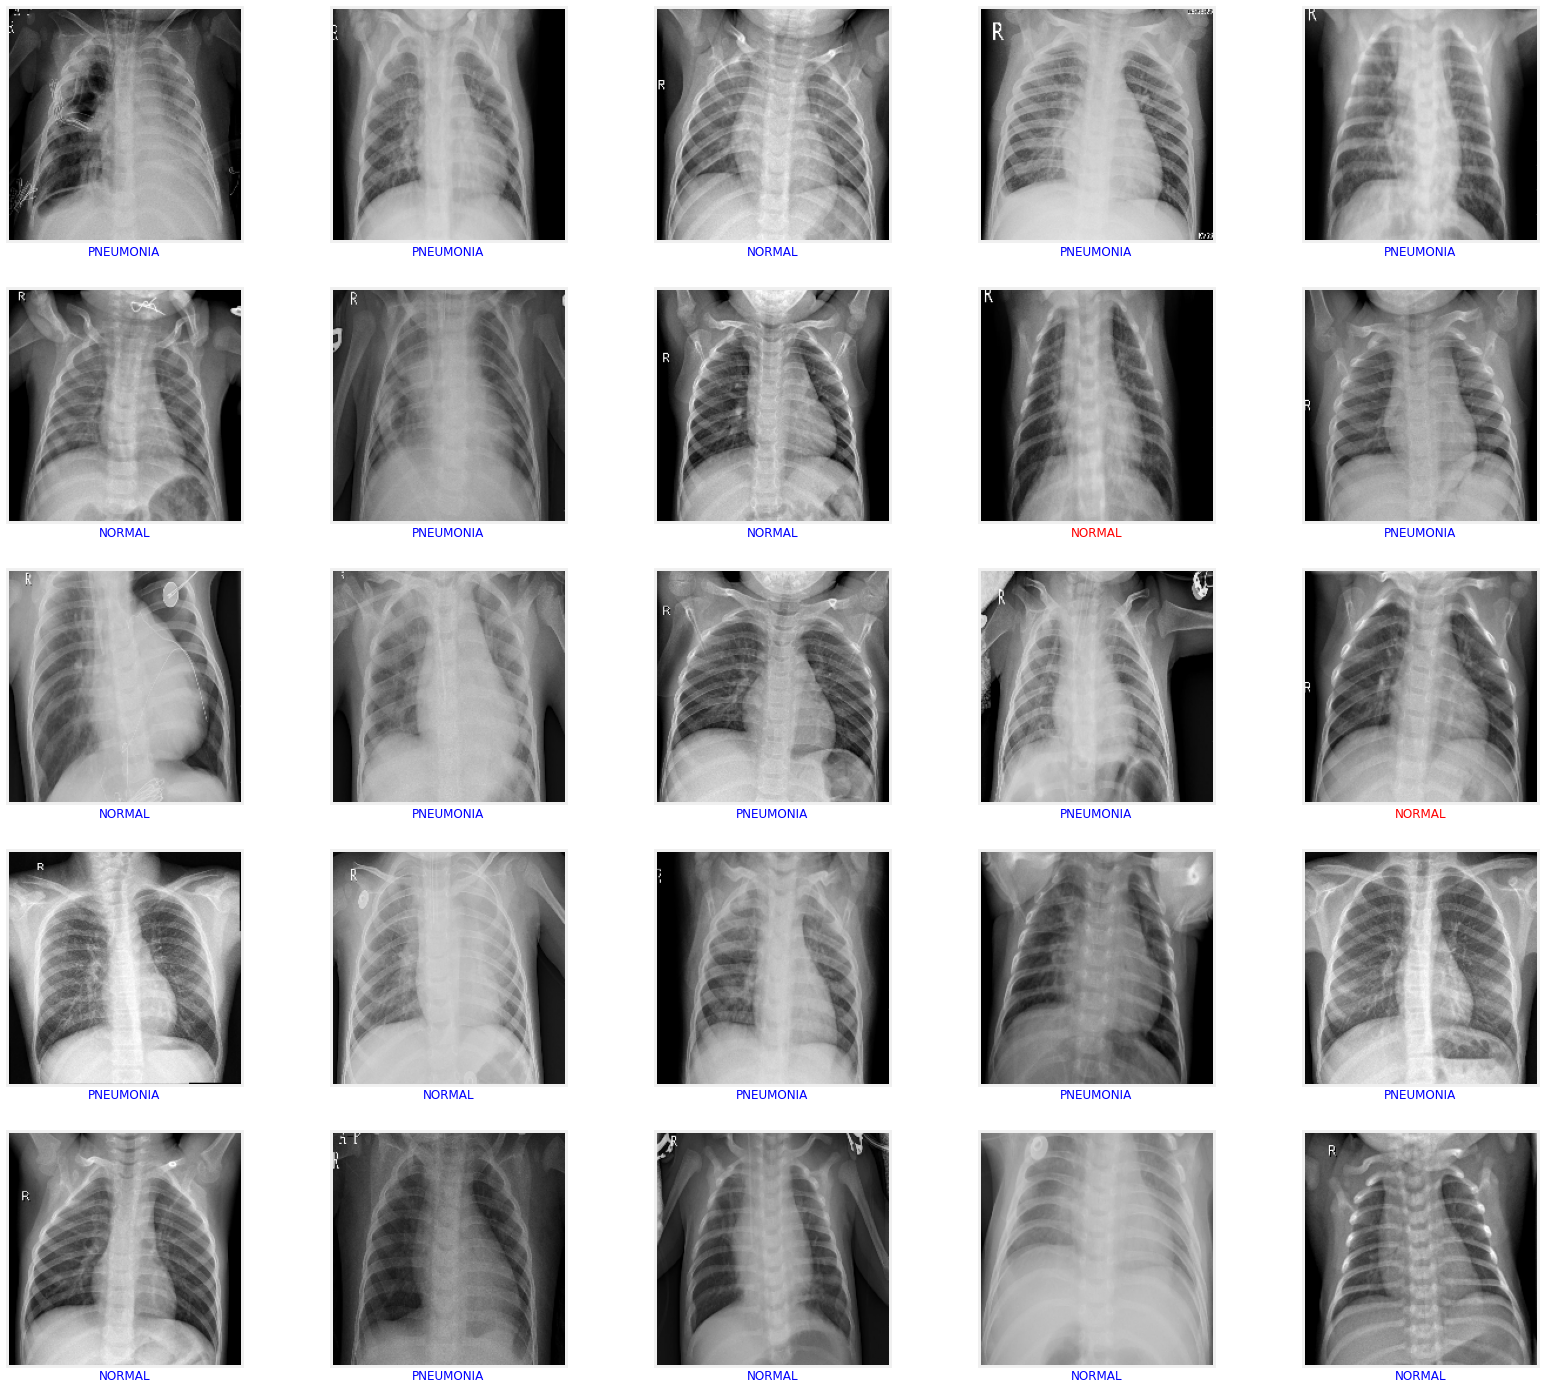

In [24]:
img_size=200
plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    if(binary_predictions[i]==y_test[i]):
        plt.xlabel(labels[binary_predictions[i]], color='blue')
    else:
        plt.xlabel(labels[binary_predictions[i]], color='red')
plt.show()
